# Lab1 #

## 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

from skimage import io
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## 2. Numpy

### 2.1 Array Basics

A = np.array([[2, 3], [4, -1], [5, 6]])

B = np.array([[5, 2], [8, 9], [2, 1]])

C1 = 3A

C2 = A+B

C3 = A.BT (dot product or inner product)

C4 = A * B (Hadamard product or elementwise product)

In [18]:
A = np.array([[2, 3], [4, -1], [5, 6]])
B = np.array([[5, 2], [8, 9], [2, 1]])

C1 = 3 * A
print ("C1:")
print (C1)

C2 = A + B
print ("C2:")
print (C2)

C3 = np.dot(A,B.T)
print ("C3:")
print (C3)

C4 = np.multiply(A,B)
print ("C4:")
print (C4)

(3, 2)
C1:
[[ 6  9]
 [12 -3]
 [15 18]]
C2:
[[ 7  5]
 [12  8]
 [ 7  7]]
C3:
[[16 43  7]
 [18 23  7]
 [37 94 16]]
C4:
[[10  6]
 [32 -9]
 [10  6]]


Calculate now the *sum*, *mean*, and *variance* of the matrix A, using NumPy functions/array properties mean, sum, var.

Afterwards, calculate the sum of the rows and then the columns of A. Hint, specify the parameter axis.


In [14]:
m = np.mean(A)
print("mean of A:")
print(m)

s = np.sum(A)
print("sum of A:")
print(s)

v = np.var(A)
print("variance of A:")
print(v)

sum_row = np.sum(A, axis=1)
print("sum of rows:")
print(sum_row)
sum_col = np.sum(A, axis=0)
print("sum of columns:")
print(sum_col)

mean of A:
3.1666666666666665
sum of A:
19
variance of A:
5.138888888888888
sum of rows:
[ 5  3 11]
sum of columns:
[11  8]


### 2.2 Sigmoid Function

The sigmoid function is a non-linear function used in machine learning (logistic regression) and also deep learning (as an activation function).

### <center> $ sigmoid(x) = {1 \over 1+e^{-x}} $ </center>

<br> where x could now be either a real number, a vector, or a matrix. </br>
<br>**Question: how to calculate sigmoid of vector or a matrix?**</br>
*The sigmoid function takes a single value input and produces an output that lies between -1 and 1, the only way to apply the sigmoid function to a vector or a matrix is by plugging in each element of the vector/matrix into the sigmoid function and storing its value.*



Implement the sigmoid function by defining a function called sigmoid which takes 1 argument x, a scalar or numpy array of any size and outputs the *sigmoid(x)*.

What is the sigmoid of the array:

A = np.array([-5, 0, 5])

Plot the sigmoid curve for $ x \in [-5,5] $

[0.0066928509242848554, 0.5, 0.9933071490757153]


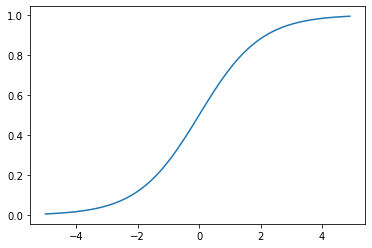

In [10]:
def sigmoid(x):
    s = []
    for i in x:
        s.append(1/(1+math.exp(-i)))
    return s

A = np.array([-5, 0, 5])
sA = sigmoid(A)
print(sA)

x = np.arange(-5.,5.,0.1)
## np.arange([start, ]stop, [step, ]dtype=None, *, like=None)
plt.plot(x,sigmoid(x))
plt.show()


### 2.3 Standardise columns using numpy

To standardise a dataset we center the data by subtracting the mean of each feature, then scale by dividing by the standard deviation of the feature. Assuming the data is arranged with features in columns and training instances in rows, standardisation will result in each column vector of the data matrix having a mean of 0 and standard deviation of 1.

### <center> $ z = {{x - µ} \over σ} $ </center>

Implement a standardiseCols(x) function to standardise the columns of a numpy array.



In [15]:
def standardiseCols(x):
    z = (x - x.mean())/(x.std())
    return z
## 答案好像不对

X = np.array([
    [1, 10], 
    [2, 9], 
    [3, 8], 
    [4, 7], 
    [5, 6], 
    [6, 5]])
s1 = standardiseCols(X)
print(s1)

Y = np.array([
    [0, 3, 5],
    [1, 6, 4],
    [3, -2, 8],
    [-1, 1, 10]])
s2 = standardiseCols(Y)
print(s2)


[[-1.71105548  1.71105548]
 [-1.33082093  1.33082093]
 [-0.95058638  0.95058638]
 [-0.57035183  0.57035183]
 [-0.19011728  0.19011728]
 [ 0.19011728 -0.19011728]]
[[-0.90889326 -0.04783649  0.52620136]
 [-0.62187434  0.81322028  0.23918244]
 [-0.04783649 -1.48293111  1.38725813]
 [-1.19591218 -0.62187434  1.96129598]]


### 2.4 Reshaping numpy arrays
The attribute <code>np.shape</code> and function <code>np.reshape()</code> are commonly used in machine learning:

<br><code>X.shape</code> is used to get the shape (dimension) of a matrix/vector X.</br>
<code>X.reshape(...)</code> is used to create a new array containing the elements of X with the provided shape.

For example, in computer vision, an image is represented by a 3D array of shape *(length, height, color)* where the colour represents the three RGB (red, green, blue) channels. Lets first load and plot the image. In order for the image to be given as an input into a machine learning algorithm, the 3D array needs to be reshaped to a vector of shape *(length\*height\*3, 1)*, that's your task below.

(606, 812, 4)

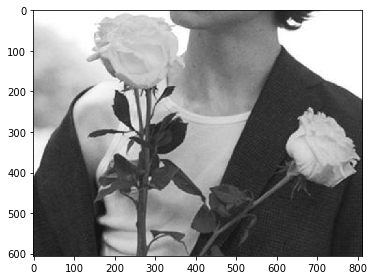

In [17]:
image = io.imread('flower.png')
io.imshow(image)
image.shape

Reshape the image array to vector v and print the shape of the created vector:

In [28]:
v = image.shape
arr = np.asarray(v) # convert tuple variable to array
newArray = image.reshape((v[0]*v[1]*v[2], 1)) # (length*height*3, 1) not working
print(newArray.shape)

(1968288, 1)


### \*Note on array dimensions

The array *a* below is a 1-dimensional array which has some slightly non-intuitive effects, such **as the transpose is the same**.

In [29]:
a = np.arange(5)
print(a)
print(a.shape)
print(a.T)
print(a.T.shape)

[0 1 2 3 4]
(5,)
[0 1 2 3 4]
(5,)


1-D arrays should be avoided and instead column or row vectors should be used which can be formed from 1-D arrays using reshape. Note the double square bracket.

The row vector of a is:

In [30]:
a = a.reshape(1,-1)
print(a)
a.shape

[[0 1 2 3 4]]


(1, 5)

The column vector of a is:

In [31]:
a = a.reshape(-1,1)
print(a)
a.shape

[[0]
 [1]
 [2]
 [3]
 [4]]


(5, 1)

You can check the dimensions are what you want by using the assert command:

In [32]:
assert(a.shape == (5,1))

### \*Note on function and object property

<p>As Python is an object oriented language, the difference between *function* and *object* property should be understood.</p>
An object instance, e.g. NumPy array <code>A = np.array([[1, 2], [3, 4], [5, 6]])</code> inherits all the functions from the class <code>numpy.ndarray</code>. Therefore, to sum all elements of array A we can choose two approaches:

<code>A.sum()</code> or
<code>np.sum(A)</code>. The first one is advisable.

Moreover, some objects have properties (e.g. shape of an array). Instead of calling the shape function, an array object has the shape property, i.e.:

<code>A.shape</code> and 
<code>np.shape(A)</code>. The first one is advisable.



## 3. Scikit-Learn Basics

### 3.1 Datasets

Scikit-learn can be used to import datasets using the dataset loader to load small standard, or 'toy', datasets (such as iris classification or boston house pricing) or the dataset fetcher to download and load larger dataset from the ‘real world’.

Firstly, load the Boston dataset and print the number of examples and features and feature names in the dataset. Note, load_boston has already been imported from sklearn.datasets.

Then using seaborn create a pairplot (or scatterplot matrix) to show feature joint relationships and individual feature distributions. Note, **the data must be in a pandas dataframe**.

Pairplots are a quick and effective way to perform exploratory data analysis (EDA) to find patterns, relationships and anomalies to guide subsequent analysis. A pairplot allows us to see both the distribution of single variables and relationships between two variables. As you can see below, a pairplot of 14 features is crowded and difficult to interpret.

More info: https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [2]:
x,y = load_boston(return_X_y = True)
feature_names=load_boston().feature_names
d = pd.DataFrame(x, columns = feature_names)
d["MEDV"]=y
print(d)
# p = sns.pairplot(d)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

### 3.2 Preprocessing
The scikit-learn has a [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) package which provides several common functions to change the raw data into something more suitable for the machine learning algorithm. In general, learning algorithms benefit from standardisation of the dataset or if some outliers are present then robust scalers or transformers are more appropriate.

Standardise the Boston training dataset loaded in the previous exercise using [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler). Check the features have zero mean and unit variance/standard deviation.

In [3]:
scaler = StandardScaler()
fitted_d = scaler.fit(d)
trans_d = scaler.fit_transform(d)
# print("scale:")
# print(fitted_d.scale_)

# print(fitted_d)
print("mean:")
print(fitted_d.mean_)
print("transformed:")
print(trans_d.var())
print(trans_d.mean())

mean:
[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01 2.25328063e+01]
transformed:
1.0000000000000002
-1.8255050523480835e-16


### 3.3 Train Test Split
Training and evaluating a model on the same dataset will lead to overfitting and poor performance on unseen data. To measure the generalisation ability of a model, it is common practice to hold out part of the available data as a test set. Scikit-learn provides a [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split) function which performs a random split into training and testing sets.

When evaluating different hyperparameters for machine learning models then there is still a risk of overfitting on the test set because the parameters can be tweaked until the model performs optimally. To solve this problem, yet another part of the dataset can be held out as a so-called validation set which is used for evaluating hyperparameter values before final evaluation can be done on the test set. However, this can drastically reduce the number of samples which can be used for model training and the performance depends on the training and validation splits. To get round this problem cross-validation can be used which trains multiple models on "folds" of the training set, read about cross-validation in scikit-learn [here](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation).

Your task is to split the Boston (scaled) training data set so 70% of the data is for training and the remaining 30% to test.

How many training examples are there in the training and test sets?

Should the <code>random_state</code> parameter be specified for the <code>train_test_split</code> function?

In [11]:
x_train, x_test, y_train, y_test = train_test_split(trans_d, y, test_size = 0.3, train_size = 0.7, random_state = True)
print('Training set size:', len(x_train))
print('Test set size:', len(x_test))

print(x_train.shape)
print(x_test.shape)
# TODO: Cross_validation

Training set size: 354
Test set size: 152
(354, 14)
(152, 14)


### 3.4 Model Fitting
Scikit-learn provides many built-in machine learning algorithms and models, called estimators. An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data. Each estimator can be fitted to some data using its fit method, as was done on the previous exercise to standardise the raw data.

Fit a simple [linear regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model to the training data from the train-test split.

Print the linear model coefficients.

In [9]:
linear_reg = LinearRegression()
x_reg = linear_reg.fit(x_train,y_train)
co = linear_reg.coef_
print(co)

[ 3.90416529e-16 -1.49547900e-16  1.49615139e-15 -4.55463770e-15
  5.05109649e-15 -4.25611633e-15  3.76926500e-16 -1.64627503e-16
  1.83018090e-15  8.80695148e-16  4.73279123e-15 -1.42551175e-15
  6.36733727e-15  9.18801155e+00]


### 3.5 Model Evaluation
Scikit-learn supports simple and quick evaluation of machine learning models using the [metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module which quantifies the quality of predictions.

Calculate the root mean squared error (RMSE) of both the training and test sets for the linear model. Is the model overfitting?

Also, plot the model predictions on a [scatter plot](https://matplotlib.org/3.2.2/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter) alongside the real values for the test data. All the data points would lie on a diagonal (prediction = real) if the model was 100% accurate.